In [158]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from utils.regression import RegressionAnalysis
from utils.regression import CorrelationAnalysis
from utils.regression import plot_linear_fit

In [159]:
any_win = pd.read_csv(r'../data/any_win_data.csv')
best_pic = pd.read_csv(r'../data/best_picture_data.csv')

In [160]:
any_win.head()

,Unnamed: 0,year_film,movie_title,num_wins,rotten_tomatoes_link,critic_name,top_critic,review_type,review_score
0,0,1927,Speedy,0,m/speedy,Matt Brunson,False,Fresh,87.5
1,2,1927,Speedy,0,m/speedy,Sarah Boslaugh,False,Fresh,70.0
2,4,1927,Speedy,0,m/speedy,Ben Nicholson,False,Fresh,80.0
3,6,1927,Speedy,0,m/speedy,Dennis Schwartz,False,Fresh,83.0
4,8,1927,Speedy,0,m/speedy,Matthew Lucas,False,Fresh,75.0


In [161]:
any_win = any_win[['rotten_tomatoes_link', 'num_wins', 'review_score']].groupby('rotten_tomatoes_link').agg({'num_wins': 'max', 'review_score': 'mean'})
any_win['success'] = any_win.num_wins > 0

In [162]:
any_win.head()

,num_wins,review_score,success
rotten_tomatoes_link,,,
m/10,0,64.547619,False
m/1000123-310_to_yuma,0,81.613636,False
m/1000224-accused,1,72.333333,True
m/1000253-adams_rib,0,81.690476,False
m/10002635-bridge_of_san_luis_rey,1,38.264706,True


In [163]:
m = pd.read_csv(r'../data/rotten_tomatoes_movies.csv')
cr = pd.read_csv(r'../data/rotten_tomatoes_critic_reviews.csv')
o = pd.read_csv(r'../data/the_oscar_award.csv')

In [164]:
m.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


Historically, are rotten tomatoes ratings good predictors of Oscar Success?

What defines Oscar Success?

Is winning Best Actor the same as Oscar Success for a film?

In [165]:
data = pd.merge(m, any_win.rename({'num_wins': 'wins'}, axis=1), on='rotten_tomatoes_link', how='right', validate='one_to_one')

In [166]:
data = data.drop(
    [
        'movie_info', 
        'critics_consensus',
        'content_rating',
        'genres',
        'directors',
        'authors',
        'actors',
        'original_release_date',
        'streaming_release_date',
        'runtime',
        'production_company',
        'audience_status'
    ], axis=1)

In [167]:
data.head()

,rotten_tomatoes_link,movie_title,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,wins,review_score,success
0,m/10,10,Fresh,67.0,24.0,53.0,14684.0,2,16,8,0,64.547619,False
1,m/1000123-310_to_yuma,3:10 to Yuma,Fresh,96.0,28.0,79.0,9243.0,6,27,1,0,81.613636,False
2,m/1000224-accused,The Accused,Fresh,91.0,22.0,79.0,20821.0,1,20,2,1,72.333333,True
3,m/1000253-adams_rib,Adam's Rib,Fresh,96.0,28.0,86.0,10563.0,6,27,1,0,81.690476,False
4,m/10002635-bridge_of_san_luis_rey,The Bridge of San Luis Rey,Rotten,4.0,24.0,35.0,1935.0,13,1,23,1,38.264706,True


data.review_score.corr(data.wins)

array([<AxesSubplot: title={'center': 'False'}, ylabel='Frequency'>,
       <AxesSubplot: title={'center': 'True'}, ylabel='Frequency'>],
      dtype=object)

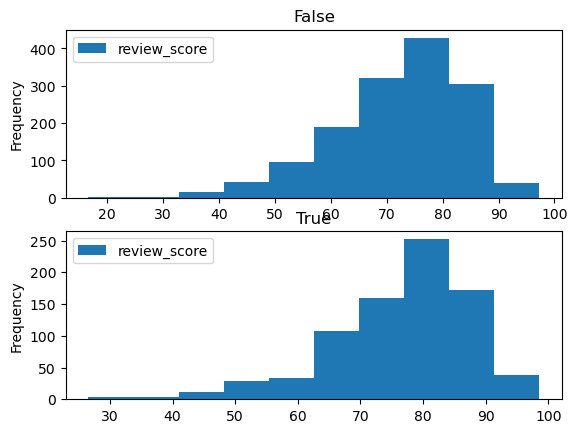

In [168]:
data.plot.hist(column=['review_score'], by='success')

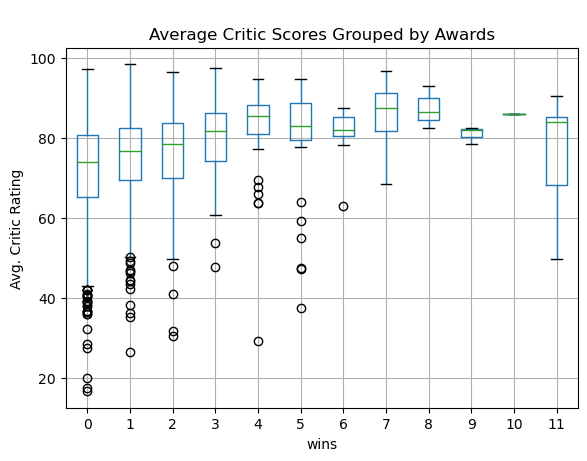

In [169]:
data.boxplot(column='review_score', by='wins')
plt.title('Average Critic Scores Grouped by Awards')
plt.ylabel("Avg. Critic Rating")
plt.suptitle(" ")
plt.savefig("../images/ratings_boxplot_by_wins.png")
plt.show()

Determining if rotten tomato scores are good predictors of Oscar Success:

Aspects of Rotten Tomato Score

    1. Audience Rating
    2. Critics Fresh/Rotten 
    3. Critic specific scores from critics file
    
Metrics of Success

    1. Number of Oscars won by the movie (More being more success) - Linear Regression Analysis
    2. Winning any Oscar Award (Bool winning or not winning) - Logistic Regression Analysis
    
The analysis can then be broken down to all Oscar categories and per category to see if ratings are predictors of some categories but not others.
    


In [170]:
data[data.tomatometer_rating.isna()]

,rotten_tomatoes_link,movie_title,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,wins,review_score,success


What does it mean for X to be a predictor of y?

    1. That the two variables are correlated (Not really what predictor means)
    2. There is a direct causal relationship i.e linear regression analysis
    3. The various values of y come from different distributions of X i.e T-tests

### Correlation Analysis

In [171]:
data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'wins', 'review_score', 'success'],
      dtype='object')

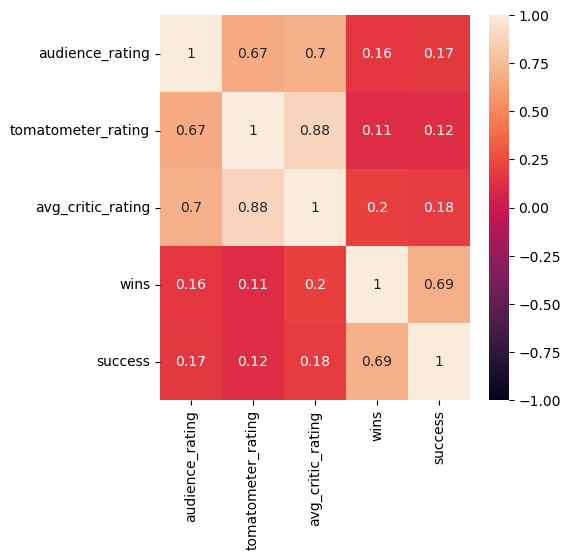

In [172]:
corr_analysis = CorrelationAnalysis(data.rename({'review_score': 'avg_critic_rating'}, axis=1))
plt.figure(figsize=(5, 5))
corr_analysis.plot_heatmap(['audience_rating', 'tomatometer_rating', 'avg_critic_rating', 'wins', 'success'], file_name="heatmap.png")

In [173]:
#1. Is there correlation between audience rating and the number of Oscar awards a movie wins?
corr_analysis.corr_coef('audience_rating', 'wins')

0.1598053534117321

In [174]:
#2. Is there a correlation between tomatometer rating and the number of Oscar awards a movie wins?
corr_analysis.corr_coef('tomatometer_rating', 'wins')

0.10619913172602463

In [175]:
#3. Is there a correlation between critic scores and the number of Oscar awards a movie wins?
corr_analysis.corr_coef('avg_critic_rating', 'wins')

0.20089408246355983

### Regression Analysis

In [176]:
'''
def plot_linear_fit(X, y_pred, y_test):
    plt.scatter(X, y_test, color='black')
    plt.scatter(X, y_pred, color='blue', marker='.')
    plt.show()
'''

"\ndef plot_linear_fit(X, y_pred, y_test):\n    plt.scatter(X, y_test, color='black')\n    plt.scatter(X, y_pred, color='blue', marker='.')\n    plt.show()\n"

In [178]:
#1. Regresion Analysis using number of awards won as measure of success
lra_wins = RegressionAnalysis(data.drop(['wins', 'success'], axis=1), data.wins, False)

0.032279850967322


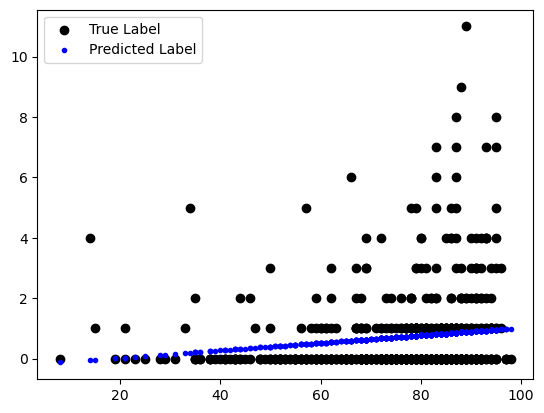

In [179]:
#1.1 Do audience ratings have a causal relationship with the number of Oscar awards a movie wins?
lra_wins.set_X_cols(['audience_rating'])
lra_wins.fit_train()
print(lra_wins.score_test())
plot_linear_fit(lra_wins.X_test(), lra_wins.predict_test(), lra_wins.y_test_)

0.01287685072976641


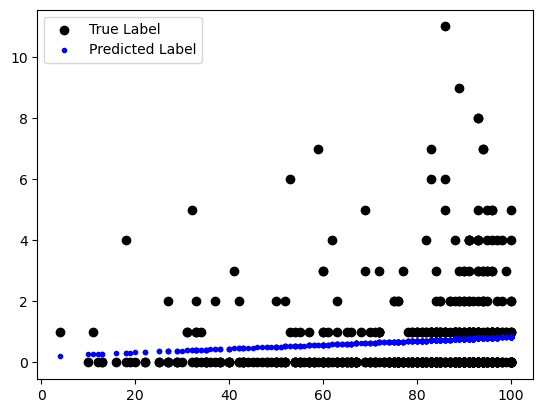

In [180]:
#1.2 Do tomatometer_ratings have a causal relationship with the number of Oscar awards a movie wins?
lra_wins.set_X_cols(['tomatometer_rating'])
lra_wins.fit_train()
print(lra_wins.score_test())
plot_linear_fit(lra_wins.X_test(), lra_wins.predict_test(), lra_wins.y_test_)

0.04512938388837662


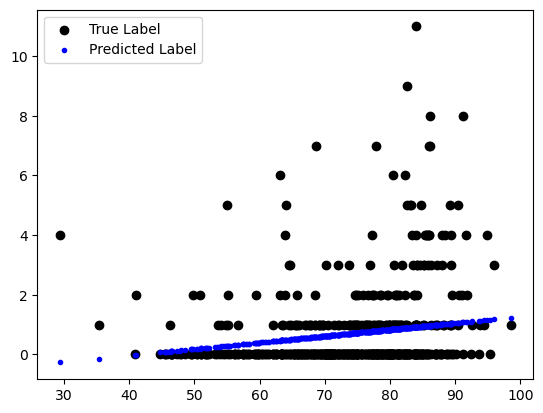

In [181]:
#1.3 Do critic scores have a causal relationship with the number of Oscar awards a movie wins?
lra_wins.set_X_cols(['review_score'])
lra_wins.fit_train()
print(lra_wins.score_test())
plot_linear_fit(lra_wins.X_test(), lra_wins.predict_test(), lra_wins.y_test_)

### Regression Analysis on Winning Any Oscar Awards

Define success as winning any Oscar award and recheck using Logistic Regression as a classification problem

This approach runs into class imbalance right away that needs to be addressed before an accurate assessment can be made

In [182]:
lga = RegressionAnalysis(data.drop(['wins', 'success'], axis=1), data.success, True)

0.6548672566371682


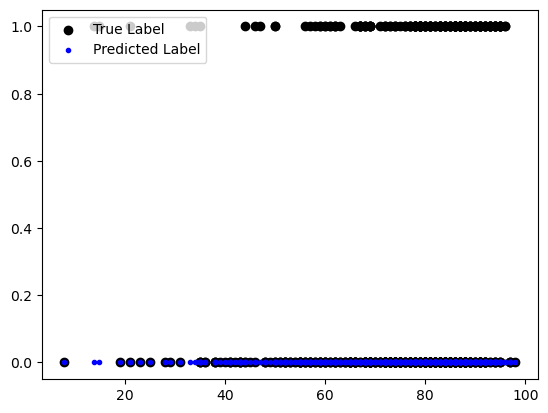

In [183]:
# audience score
lga.set_X_cols(['audience_rating'])
lga.fit_train()
print(lga.score_test())
plot_linear_fit(lga.X_test(), lga.predict_test(), lga.y_test_)

0.6548672566371682


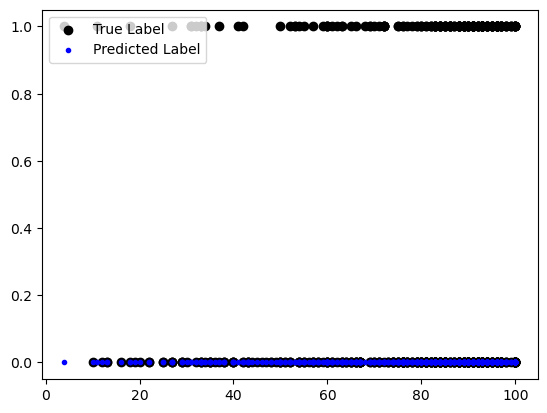

In [184]:
# tomatometer score
lga.set_X_cols(['tomatometer_rating'])
lga.fit_train()
print(lga.score_test())
plot_linear_fit(lga.X_test(), lga.predict_test(), lga.y_test_)

0.6637168141592921


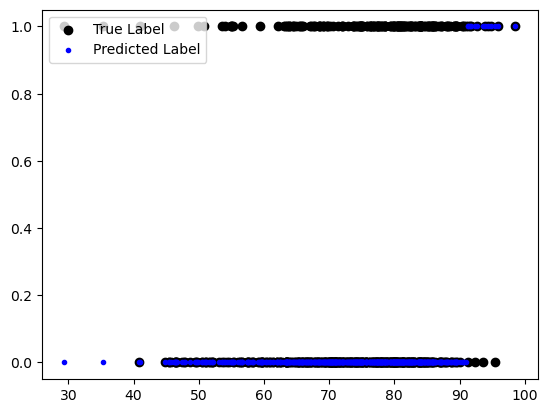

In [185]:
# average critic score
lga.set_X_cols(['review_score'])
lga.fit_train()
print(lga.score_test())
plot_linear_fit(lga.X_test(), lga.predict_test(), lga.y_test_)

## How well do Oscar awards predict historically?

Using no test set, as we are checking historic fit

In [191]:
lra = RegressionAnalysis(data.review_score, data.wins, False, test_size = 0)
lga = RegressionAnalysis(data.review_score, data.success, True, test_size = 0)

0.040358432368875374


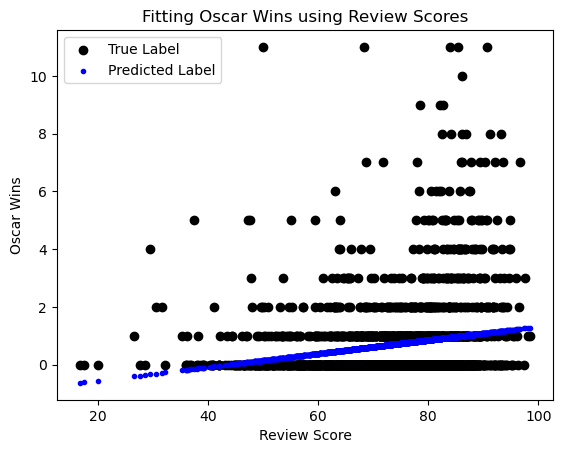

In [192]:
lra.fit_train()
print(lra.score_test())
plot_linear_fit(lra.X_test(), lra.predict_test(), lra.y_test_, y_label = "Oscar Wins", x_label = "Review Score", title="Fitting Oscar Wins using Review Scores", output_filename="oscar_wins_review_score_fit.png")

0.6482055826318122


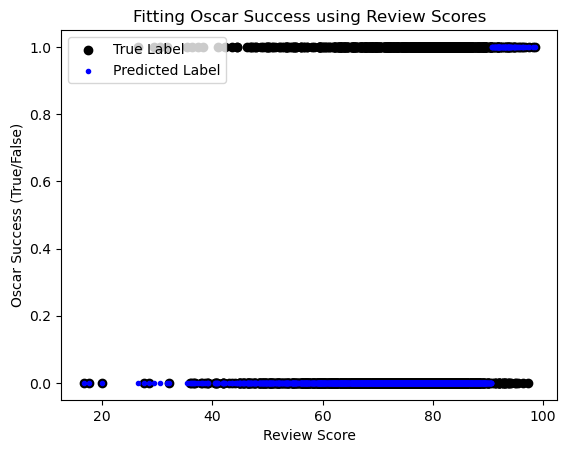

In [193]:
lga.fit_train()
print(lga.score_test())
plot_linear_fit(lga.X_test(), lga.predict_test(), lga.y_test_, y_label = "Oscar Success (True/False)", x_label = "Review Score", title="Fitting Oscar Success using Review Scores", output_filename="oscar_success_review_score_fit.png")